In [5]:
from src.databases.network import Network
from src.literature_mining.paper import Paper
from src.entities.protein import Protein
from collections import defaultdict
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = Paper.analyse_papers()
df

  0%|          | 0/61 [00:00<?, ?it/s]

100%|██████████| 61/61 [01:32<00:00,  1.52s/it]


,A,B,Interaction,A-B
0,A0A1B2YKT1,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKT1
15,A0A1B2YKT5,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKT5
20,A0A1B2YKT7,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKT7
10,A0A1B2YKT8,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKT8
5,A0A1B2YKU0,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKU0
...,...,...,...,...
0,S5U5N5,S5U5N5,1.0,S5U5N5-S5U5N5
2,S5YHG7,S5U5N5,1.0,S5U5N5-S5YHG7
4,W8CRN8,S5U5N5,0.0,S5U5N5-W8CRN8
3,W8CSC4,S5U5N5,0.0,S5U5N5-W8CSC4


In [3]:
df[df['Interaction'] > 0]

,A,B,Interaction,A-B
0,A0A1B2YKT1,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKT1
15,A0A1B2YKT5,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKT5
20,A0A1B2YKT7,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKT7
10,A0A1B2YKT8,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKT8
5,A0A1B2YKU0,A0A1B2YKT1,1.0,A0A1B2YKT1-A0A1B2YKU0
...,...,...,...,...
49,A0A8K0Z7F3,A0A8K0Z733,1.0,A0A8K0Z733-A0A8K0Z7F3
3,Q8LLR0,A0A217EJJ0,1.0,A0A217EJJ0-Q8LLR0
1,Q537G5,S5U5N5,1.0,Q537G5-S5U5N5
0,S5U5N5,S5U5N5,1.0,S5U5N5-S5U5N5


In [3]:
# Check that all interactors are MIKC proteins and the mutations are processed correctly
interactors = set(df['A']) | set(df['B'])
for i in interactors:
    try:
        Protein(i)
    except:
        print(i)

In [4]:
for interactor in interactors:
    Protein(interactor).save()

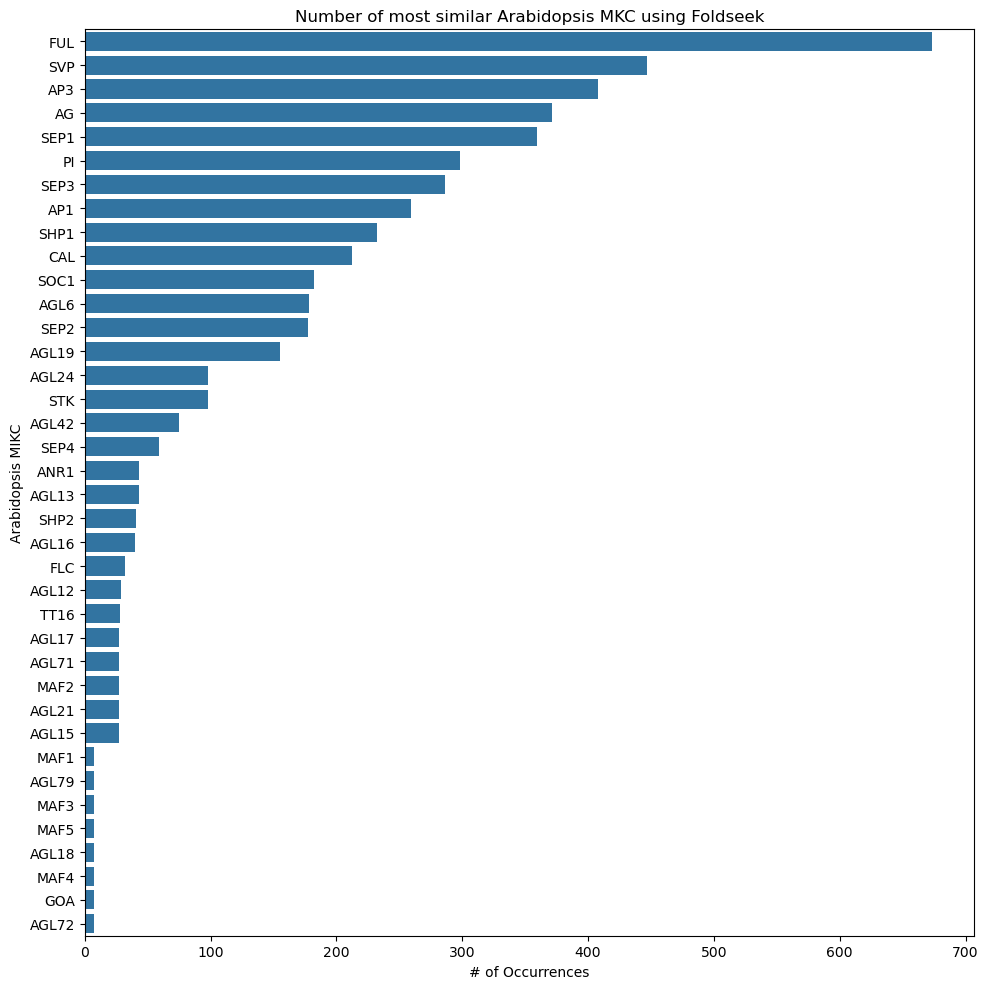

<Figure size 640x480 with 0 Axes>

In [6]:

ms = defaultdict(int)
for pair in df['A-B']:
    p1, p2 = pair.split('-')
    p1 = Protein(p1)
    p2 = Protein(p2)
    ms[p1.most_similar] += 1
    ms[p2.most_similar] += 1

df = pd.DataFrame.from_dict(ms, orient='index', columns=['values'])

# Reset index to make 'one', 'two', etc., regular columns
df.reset_index(inplace=True)
df = df.sort_values(by='values', ascending=False)
# Step 2: Use Seaborn to create a boxplot
plt.figure(figsize=(10, 10))  # Optional: Adjust figure size
sns.barplot(y=df['index'], x=df['values'], orient = 'y')
plt.title('Number of most similar Arabidopsis MKC using Foldseek')
plt.xlabel('# of Occurrences')
plt.ylabel('Arabidopsis MIKC')
plt.tight_layout()
plt.show()
plt.savefig('.')
